In [1]:
import mosaic

from stride import *
from stride.utils import wavelets

%matplotlib notebook

In [2]:
# Create the grid
shape = (356, 385)
extra = (50, 50)
absorbing = (40, 40)
spacing = (0.5e-3, 0.5e-3)

space = Space(shape=shape,
              extra=extra,
              absorbing=absorbing,
              spacing=spacing)

start = 0.
step = 0.08e-6
num = 2500

time = Time(start=start,
            step=step,
            num=num)

In [3]:
# Create problem
problem = Problem(name='anastasio2D',
                  space=space, time=time)

In [4]:
# Create medium
vp = ScalarField('vp', grid=problem.grid)
vp.load('data/anastasio2D-TrueModel.h5')

problem.medium.add(vp)

In [5]:
# Create transducers
problem.transducers.default()

In [6]:
# Create geometry
num_locations = 128
problem.geometry.default('elliptical', num_locations)

In [7]:
# Create acquisitions
problem.acquisitions.default()

# Create wavelets
f_centre = 0.50e6
n_cycles = 3

for shot in problem.acquisitions.shots:
    shot.wavelets.data[0, :] = wavelets.tone_burst(f_centre, n_cycles,
                                                   time.num, time.step)

<IPython.core.display.Javascript object>


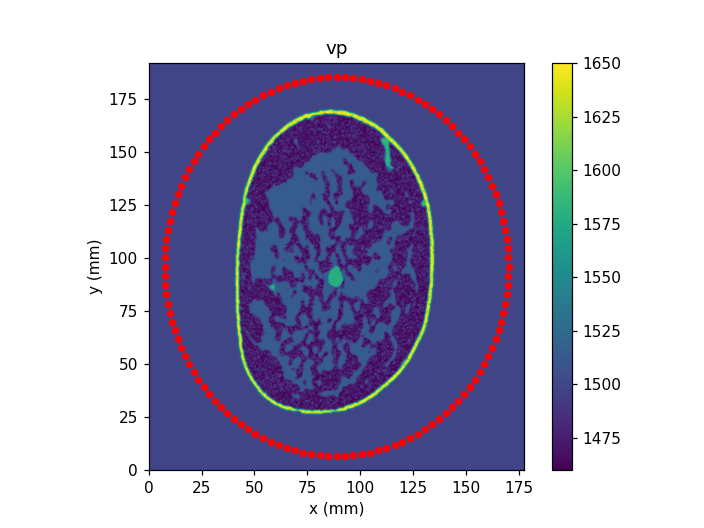

<IPython.core.display.Javascript object>


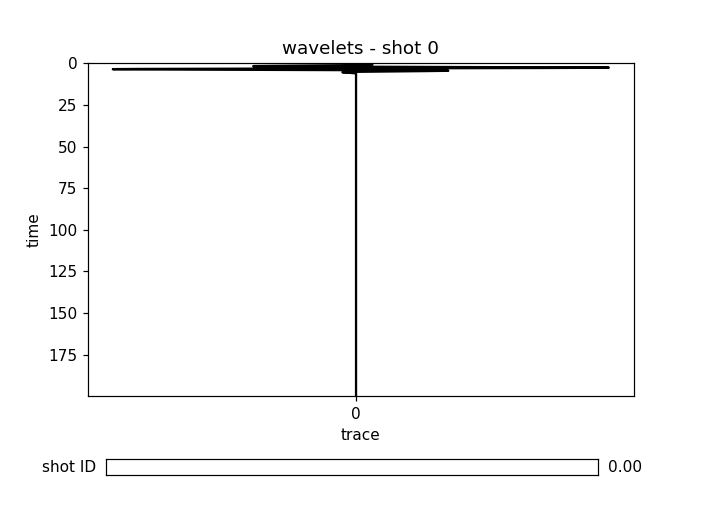

In [8]:
# Plot
problem.plot()

In [12]:
await mosaic.interactive('on')

2021-02-25 12:40:01,787 - INFO       HEAD            Listening at <CommsManager object at 140677787200784, uid=head, address=155.198.98.57, port=3000, state=listening>
2021-02-25 12:40:01,821 - INFO       MONITOR         Listening at <CommsManager object at 140680262090832, uid=monitor, address=155.198.98.57, port=3001, state=listening>
2021-02-25 12:40:01,858 - INFO       NODE:0          Listening at <CommsManager object at 140677787296528, uid=node:0, address=155.198.98.57, port=3002, state=listening>
2021-02-25 12:40:01,885 - INFO       WORKER:0:0      Listening at <CommsManager object at 140680262045840, uid=worker:0:0, address=155.198.98.57, port=3003, state=listening>


In [10]:
# Run
await problem.forward()

In [14]:
await mosaic.interactive('off')

AttributeError: 'NoneType' object has no attribute 'get_event_loop'